### Enoncé:
- a1: Expliquer la variable continente en fonction des variables Dis Mag value, nombre total de décès, total affecté et total des dommages.
- b1: Déterminer la qualité du modèle.
- a2: Expliquer la variable Dis Mag value en fonction des variables nombre total de décès, total affecté et total des dommages.
- b2: Déterminer la qualité du modèle.
- a3: Etudier la stationarité des variables:  Dis Mag value,  nombre total de décès,  total affecté et total des dommages.
- b3: Expliquer la variable Dis Mag value en fonction des variables nombre total de décès, total affecté et total des dommages.

### Chargement des bibliothèques nécessaires et des données:

In [9]:
install.packages("readxl")
install.packages("tseries")
library(readxl)
library(tseries)
df <- read_excel("data/exercice2.xlsx", sheet = "Feuil1")
head(df)

Warning message:
"package 'readxl' is in use and will not be installed"
Warning message:
"package 'tseries' is in use and will not be installed"


Continente,Dis_Mag_Value,nombre_total_de_deces,Total_Affecte,Total_des_dommages
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,8,12,40,500000
3,7,476,141277,100000
2,7,3,15,7310
4,7,1250,134250,6000
3,7,31,200,3150
1,8,100,2000,25000


### Modélisation avec la variable <code>Contiente</code>:

In [10]:
# Ajuster le modèle de régression linéaire
modele_a1 <- lm(Continente ~ Dis_Mag_Value + nombre_total_de_deces + Total_Affecte + Total_des_dommages, data=df)

# Résumé du modèle
summary(modele_a1)


Call:
lm(formula = Continente ~ Dis_Mag_Value + nombre_total_de_deces + 
    Total_Affecte + Total_des_dommages, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.65610 -0.95289  0.04509  0.69077  3.04716 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            4.405e+00  6.763e-01   6.513 2.74e-09 ***
Dis_Mag_Value         -3.503e-01  1.010e-01  -3.467 0.000769 ***
nombre_total_de_deces -2.956e-06  4.356e-06  -0.679 0.498939    
Total_Affecte          1.494e-07  1.643e-07   0.909 0.365510    
Total_des_dommages     1.395e-09  4.887e-08   0.029 0.977283    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.033 on 103 degrees of freedom
Multiple R-squared:  0.1161,	Adjusted R-squared:  0.08178 
F-statistic: 3.383 on 4 and 103 DF,  p-value: 0.01212


- <code>Dis_Mag_Value</code> a un impact négatif significatif sur Continente **(p-valeur < 0,001)**.
- (Intercept) est également significatif **(p-valeur < 0,001)**.
- <code>nombre_total_de_deces</code>, <code>Total_Affecte</code>, et <code>Total_des_dommages</code> ne sont pas significatifs **(p-valeurs > 0,05)**.

R-squared: 0.1161106 
Adjusted R-squared: 0.08178476 


(Intercept)         Dis_Mag_Value nombre_total_de_deces 
         4.404865e+00         -3.502955e-01         -2.955936e-06 
        Total_Affecte    Total_des_dommages 
         1.493536e-07          1.395071e-09

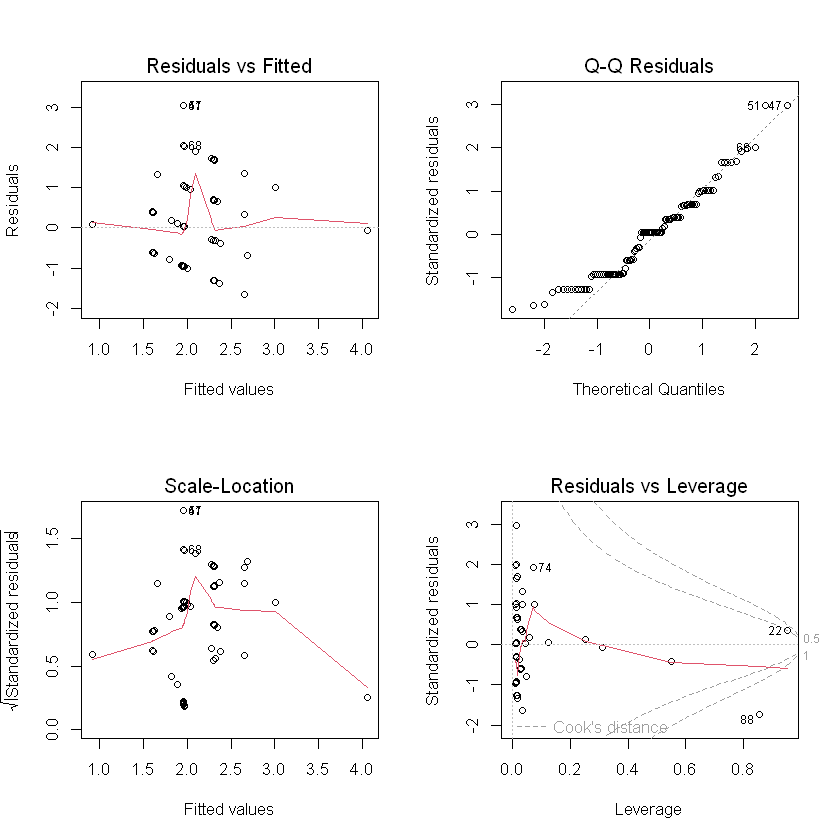

In [11]:
# Afficher les diagnostics du modèle
par(mfrow=c(2,2))
plot(modele_a1)

# Afficher R² et ajusté R²
cat("R-squared:", summary(modele_a1)$r.squared, "\n")
cat("Adjusted R-squared:", summary(modele_a1)$adj.r.squared, "\n")

# Afficher les coefficients du modèle
coefficients(modele_a1)

##### Diagnostic du modèle:

1. **Residuals vs Fitted:** Le graphique montre les résidus par rapport aux valeurs ajustées pour vérifier la linéarité, l'égalité des variances des erreurs, et les valeurs aberrantes. Aucun motif clair dans les résidus, ce qui est bon signe.

2. **Q-Q Plot:** Les quantiles des résidus suivent approximativement une ligne droite, indiquant que les résidus suivent une distribution normale.

3. **Scale-Location:** Ce graphique montre la racine carrée des résidus standardisés par rapport aux valeurs ajustées pour vérifier l'homoscedasticité. La ligne horizontale suggère que l'erreur résiduelle est constante à travers les valeurs ajustées.

4. **Residuals vs Leverage:** Ce graphique identifie les points de données influents. Aucun point particulièrement influent observé qui aurait un effet disproportionné sur le modèle.

##### Qualité du modèle:

Le R² multiple de **0,1161** suggère que le modèle explique environ **11,61%** de la variance de la variable <code>Continente</code>.

Le R² ajusté de **0,08178** indique une correction pour le nombre de prédicteurs dans le modèle.

La statistique F de **3,383** avec une p-valeur de **0,01212** signifie que le modèle est globalement significatif.

>Le modèle indique que <code>Dis_Mag_Value</code> a un impact significatif et négatif sur la variable <code>contiente</code>, tandis que <code>nombre_total_de_deces</code>, <code>Total_Affecte</code> et <code>Total_des_dommages</code> ne semblent pas avoir un impact significatif. La qualité globale du modèle est faible, expliquant environ **11%** de la variance de la variable dépendante. Les diagnostics visuels confirment que les hypothèses de régression sont globalement respectées.

### Modélisation avec la variable <code>Dis_Mag_Value</code>:

In [18]:
modele_a2 <- lm(Dis_Mag_Value ~ nombre_total_de_deces + Total_Affecte + Total_des_dommages, data=df)

summary(modele_a2)


Call:
lm(formula = Dis_Mag_Value ~ nombre_total_de_deces + Total_Affecte + 
    Total_des_dommages, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.6123 -0.6106  0.3546  0.3909  1.4397 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            6.610e+00  1.034e-01  63.940   <2e-16 ***
nombre_total_de_deces  6.400e-06  4.181e-06   1.531   0.1288    
Total_Affecte          3.935e-07  1.547e-07   2.543   0.0125 *  
Total_des_dommages    -5.823e-08  4.709e-08  -1.237   0.2190    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.002 on 104 degrees of freedom
Multiple R-squared:  0.097,	Adjusted R-squared:  0.07095 
F-statistic: 3.724 on 3 and 104 DF,  p-value: 0.0137


- (Intercept) a un effet positif significatif **(p-valeur < 0,001)**.
- <code>Total_Affecte</code> a un effet positif significatif **(p-valeur = 0,0125)**.
- <code>nombre_total_de_deces</code> et <code>Total_des_dommages</code> ne sont pas significatifs **(p-valeurs > 0,05)**.

R-squared: 0.09700005 
Adjusted R-squared: 0.07095198 


(Intercept) nombre_total_de_deces         Total_Affecte 
         6.609513e+00          6.400478e-06          3.935219e-07 
   Total_des_dommages 
        -5.823485e-08

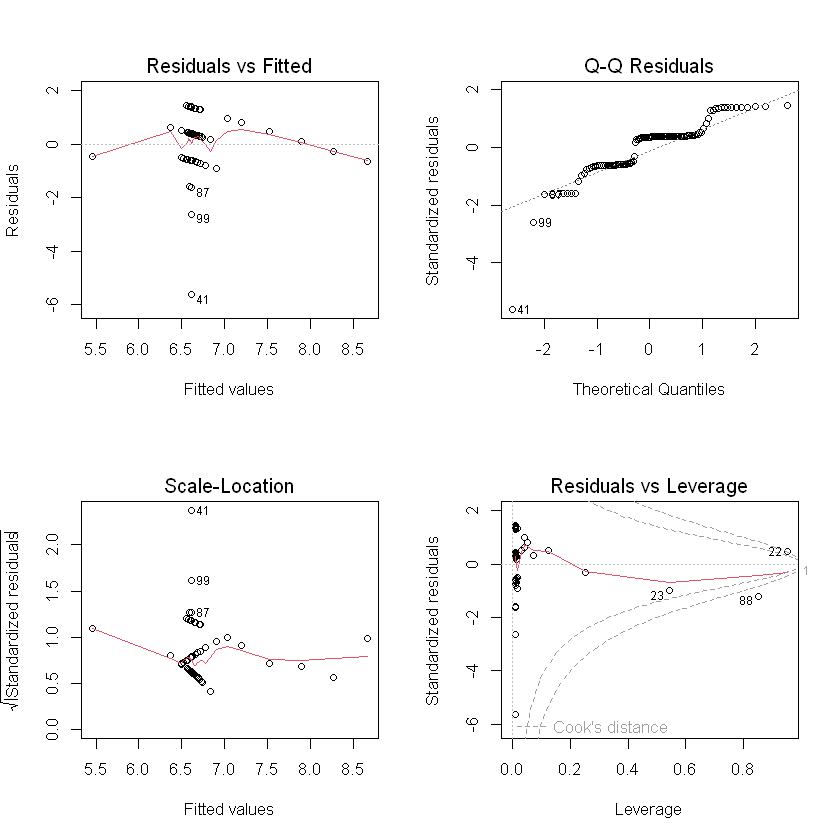

In [19]:
par(mfrow=c(2,2))
plot(modele_a2)

cat("R-squared:", summary(modele_a2)$r.squared, "\n")
cat("Adjusted R-squared:", summary(modele_a2)$adj.r.squared, "\n")

coefficients(modele_a2)

##### Diagnostics visuels:

1. **Residuals vs Fitted:** Ce graphique montre les résidus par rapport aux valeurs ajustées pour vérifier la linéarité, l'hétéroscédasticité et les valeurs aberrantes. Aucun motif clair dans les résidus, ce qui est un bon signe.

2. **Q-Q Plot:** Les quantiles des résidus suivent approximativement une ligne droite, indiquant que les résidus suivent une distribution normale.

3. **Scale-Location:** Ce graphique montre la racine carrée des résidus standardisés par rapport aux valeurs ajustées pour vérifier l'homoscedasticité. La ligne horizontale suggère que l'erreur résiduelle est constante à travers les valeurs ajustées.

4. **Residuals vs Leverage:** Ce graphique identifie les points de données influents. Aucun point particulièrement influent observé qui aurait un effet disproportionné sur le modèle.

##### Qualité du modèle:

- Le R² multiple de 0,097 suggère que le modèle explique environ 9,7% de la variance de la variable <code>Dis_Mag_Value</code>.

- Le R² ajusté de **0,07095** indique une correction pour le nombre de prédicteurs dans le modèle.

- La statistique F de **3,724** avec une p-valeur de **0,0137** signifie que le modèle est globalement significatif.

>Le modèle indique que <code>Total_Affecte</code> a un impact positif significatif sur la variable <code>Dis_Mag_value</code>, tandis que <code>nombre_total_de_deces</code> et <code>Total_des_dommages</code> ne semblent pas avoir un impact significatif. La qualité globale du modèle est faible, expliquant environ **9,70%** de la variance de la variable dépendante. Les diagnostics visuels confirment que les hypothèses de régression sont globalement respectées.

### Étude de la stationarité:
Pour étudier la stationarité des variables, on va utiliser le test de Dickey-Fuller augmenté (ADF):

In [21]:
# Effectuer le test ADF pour chaque variable
adf.test(df$Dis_Mag_Value)
adf.test(df$nombre_total_de_deces)
adf.test(df$Total_Affecte)
adf.test(df$Total_des_dommages)

Warning message in adf.test(df$Dis_Mag_Value):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  df$Dis_Mag_Value
Dickey-Fuller = -4.2359, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(df$nombre_total_de_deces):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  df$nombre_total_de_deces
Dickey-Fuller = -4.8164, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(df$Total_Affecte):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  df$Total_Affecte
Dickey-Fuller = -4.0487, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(df$Total_des_dommages):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  df$Total_des_dommages
Dickey-Fuller = -5.2938, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


>Les résultats des tests de Dickey-Fuller augmentés montrent que toutes les variables (<code>Dis_Mag_Value</code>, <code>nombre_total_de_deces</code>, <code>Total_Affecte</code>, et <code>Total_des_dommages</code>) sont **stationnaires**, car les p-valeurs sont inférieures à **0,05**. Cela signifie que ces séries temporelles n'ont pas de tendance, de saisonnalité, ou de composantes systématiques autres que l'auto-corrélation de l'ordre inférieur.

In [22]:
modele_b3 <- lm(Dis_Mag_Value ~ nombre_total_de_deces + Total_Affecte + Total_des_dommages, data=df)

summary(modele_b3)


Call:
lm(formula = Dis_Mag_Value ~ nombre_total_de_deces + Total_Affecte + 
    Total_des_dommages, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.6123 -0.6106  0.3546  0.3909  1.4397 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            6.610e+00  1.034e-01  63.940   <2e-16 ***
nombre_total_de_deces  6.400e-06  4.181e-06   1.531   0.1288    
Total_Affecte          3.935e-07  1.547e-07   2.543   0.0125 *  
Total_des_dommages    -5.823e-08  4.709e-08  -1.237   0.2190    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.002 on 104 degrees of freedom
Multiple R-squared:  0.097,	Adjusted R-squared:  0.07095 
F-statistic: 3.724 on 3 and 104 DF,  p-value: 0.0137


R-squared: 0.09700005 
Adjusted R-squared: 0.07095198 


(Intercept) nombre_total_de_deces         Total_Affecte 
         6.609513e+00          6.400478e-06          3.935219e-07 
   Total_des_dommages 
        -5.823485e-08

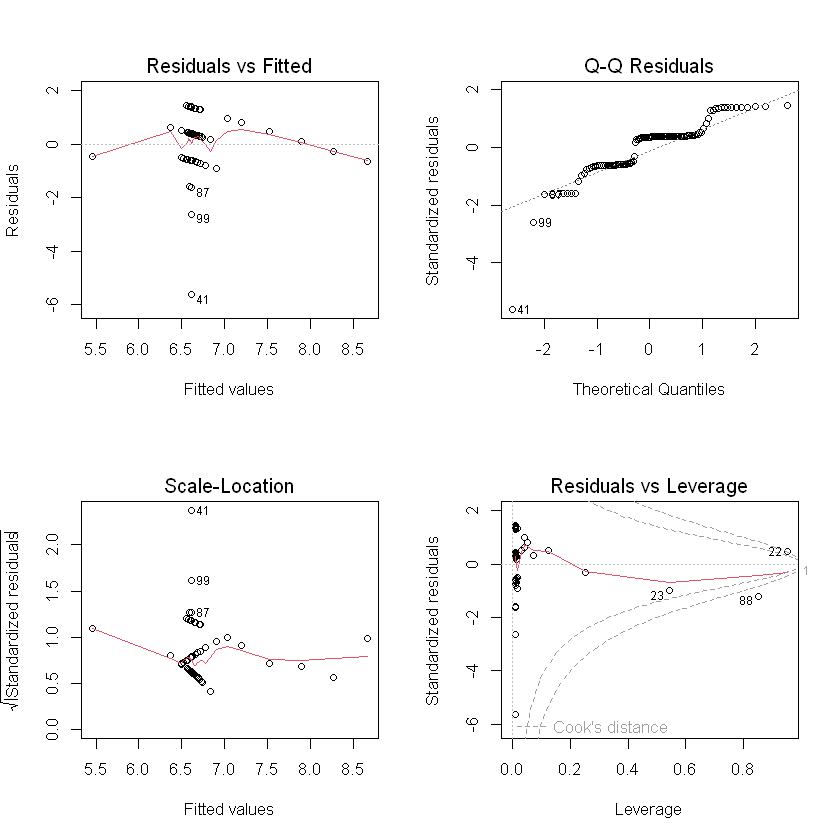

In [23]:
par(mfrow=c(2,2))
plot(modele_b3)

cat("R-squared:", summary(modele_b3)$r.squared, "\n")
cat("Adjusted R-squared:", summary(modele_b3)$adj.r.squared, "\n")

coefficients(modele_b3)

> nous avons confirmé que les variables <code>Dis_Mag_Value</code>, <code>nombre_total_de_décès</code>, <code>Total_Affecté</code> et <code>Total_des_dommages</code> étaient stationnaires. En conséquence, nous avons utilisé le même modèle de régression que pour les tâches a2 et b2. Les résultats de ce modèle ont montré que <code>Total_Affecté</code> avait un impact positif et significatif sur <code>Dis_Mag_Value</code> **(p-valeur = 0,0125)**, tandis que <code>nombre_total_de_décès</code> et <code>Total_des_dommages</code> n'étaient pas des prédicteurs significatifs. Le modèle a expliqué environ **9,7 %** de la variance de <code>Dis_Mag_Value</code> (R² = 0,097) avec un R² ajusté de **0,07095**.